In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/Users/alexlei/Downloads/accepted_2007_to_2018Q4.csv', index_col=0, low_memory=False)

In [3]:
df = df.drop(df.loc[:, 'hardship_flag':'settlement_term'].columns, axis=1)

In [4]:
sampled_df = df.sample(n=1000, random_state=42)

In [5]:
X = sampled_df

In [6]:
y = sampled_df['loan_status']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [9]:
# Create an Explainable Boosting Machine (EBM)
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier()

# Fit the EBM on the training data
ebm.fit(X_train, y_train)

/Users/alexlei/anaconda3/lib/python3.11/site-packages/interpret/utils/_preprocessor.py:314: RuntimeWarning: All-NaN slice encountered
  min_feature_val = np.nanmin(X_col)
/Users/alexlei/anaconda3/lib/python3.11/site-packages/interpret/utils/_preprocessor.py:315: RuntimeWarning: All-NaN slice encountered
  max_feature_val = np.nanmax(X_col)
/Users/alexlei/anaconda3/lib/python3.11/site-packages/interpret/glassbox/_ebm/_ebm.py:669: UserWarning: Missing values detected. Our visualizations do not currently display missing values. To retain the glassbox nature of the model you need to either set the missing values to an extreme value like -1000 that will be visible on the graphs, or manually examine the missing value score in ebm.term_scores_[term_index][0]
  warn(
/Users/alexlei/anaconda3/lib/python3.11/site-packages/interpret/glassbox/_ebm/_ebm.py:933: UserWarning: Detected multiclass problem. Forcing interactions to 0. Multiclass interactions work except for global visualizations, so the 

ExplainableBoostingClassifier()

In [10]:
from interpret import show
show(ebm.explain_global())

<!-- http://127.0.0.1:7001/5705739536/ -->

In [ ]:
# Random Forest from PCA

In [24]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([('Step', PCA()), ('Random', RandomForestClassifier())])
# The pipeline can be used as any other estimator
# and avoids leaking the test set into the train set
pipe.fit(X_train[['int_rate', 'loan_amnt', 'total_pymnt', 'last_fico_range_low', 'last_fico_range_high']], y_train).score(X_test[['int_rate', 'loan_amnt', 'total_pymnt', 'last_fico_range_low', 'last_fico_range_high']], y_test)

#pipe.set_params(svc__C=10).fit(X_train, y_train).score(X_test, y_test)

0.9

In [23]:
pipe.set_params(Step__n_components=5).fit(X_train[['int_rate', 'loan_amnt', 'total_pymnt', 'last_fico_range_low', 'last_fico_range_high']], y_train).score(X_test[['int_rate', 'loan_amnt', 'total_pymnt', 'last_fico_range_low', 'last_fico_range_high']], y_test)

0.908

In [ ]:
# AUC and F-1 Score

In [30]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y, ebm.predict_proba(X), multi_class='ovr')

In [31]:
auc

0.9998604796326508

In [38]:
auc_random = roc_auc_score(y_train, pipe.predict_proba(X_train[['int_rate', 'loan_amnt', 'total_pymnt', 'last_fico_range_low', 'last_fico_range_high']]), multi_class='ovo')

In [39]:
auc_random

1.0

## Graph plots:

In [ ]:
# Line plot

In [44]:
mapping_loan_status = {
    'Fully Paid': 1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Current': 0.75,
    'Late (16-30 days)': 0.5,
    'Late (31-120 days)': 0.25,
    'In Grace Period': 0.25,
    'Charged Off': 0,
    'Default': 0,
    'Does not meet the credit policy. Status:Charged Off': 0
}

df['loan_status'] = df['loan_status'].map(mapping_loan_status)

In [43]:
df['last_fico_range_high'].unique()

array([564., 699., 704., 679., 759., 654., 674., 719., 589., 754., 584.,
       764., 779., 724., 794., 744., 639., 664., 659., 499., 809., 694.,
       629., 604., 769., 734., 739., 524., 689., 799., 774., 709., 669.,
       614., 649., 804., 594., 814., 634., 504., 609., 514., 624., 684.,
       784., 714., 519., 559., 749., 529., 729., 549., 819., 644., 569.,
       579., 544., 554., 789., 839., 829., 599., 619., 574., 539., 534.,
       509., 834., 824.,   0., 844., 850.,  nan])

In [45]:
df['loan_status'].unique()

array([1.  , 0.75, 0.  , 0.25, 0.5 ,  nan])

In [47]:
import matplotlib.pyplot as plt

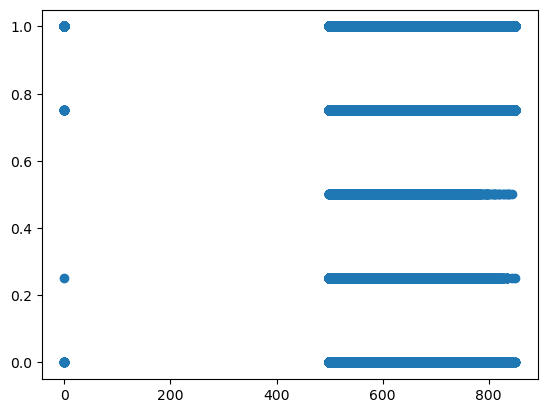

In [48]:
plt.scatter(df['last_fico_range_high'], df['loan_status'])
plt.show()

## To convert all 'obejct' columns into numeric:

In [ ]:
# Check data types for all columns

In [ ]:
pd.options.display.max_rows = 200
df.dtypes

In [ ]:
# Convert the 'term' column to numeric

In [ ]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = pd.to_numeric(df['term'])

In [ ]:
df['term']

In [ ]:
# Convert the 'grade' column to numeric

In [ ]:
df['grade'].unique()

In [ ]:
mapping_term = {'A': 1, 'B': 0.833, 'C': 0.667, 'D': 0.5, 'E': 0.333, 'F': 0.167, 'G': 0}
#df.replace({'A': mapping, 'B': mapping, 'C': mapping, 'D': mapping, 'E': mapping, 'F': mapping, 'G': mapping})
#df['grade'] = pd.to_numeric(df['grade'])
df.applymap(lambda x: mapping_term.get(x) if x in mapping_term else x)

In [ ]:
# Convert the 'sub_grade' column to numeric

In [ ]:
df['sub_grade'].unique()

In [ ]:
mapping_subgrade = {
    'A5': 1.0, 'A4': 0.9706, 'A3': 0.9412, 'A2': 0.9118, 'A1': 0.8824,
    'B5': 0.8529, 'B4': 0.8235, 'B3': 0.7941, 'B2': 0.7647, 'B1': 0.7353,
    'C5': 0.7059, 'C4': 0.6765, 'C3': 0.6471, 'C2': 0.6176, 'C1': 0.5882,
    'D5': 0.5588, 'D4': 0.5294, 'D3': 0.5000, 'D2': 0.4706, 'D1': 0.4412,    
    'E5': 0.4118, 'E4': 0.3824, 'E3': 0.3529, 'E2': 0.3235, 'E1': 0.2941,
    'F5': 0.2647, 'F4': 0.2353, 'F3': 0.2059, 'F2': 0.1765, 'F1': 0.1471,
    'G5': 0.1176, 'G4': 0.0882, 'G3': 0.0588, 'G2': 0.0294, 'G1': 0,
}

# Use the map function to replace values based on the mapping dictionary
df['sub_grade'] = df['sub_grade'].map(mapping_subgrade)

In [ ]:
# Convert the 'emp_length' column to numeric

In [ ]:
df['emp_length'].unique()

In [ ]:
mapping_emp_length = {
    '10+ years': 1,
    '9 years': 0.9,
    '8 years': 0.8,
    '7 years': 0.7,
    '6 years': 0.6,
    '5 years': 0.5,
    '4 years': 0.4,
    '3 years': 0.3,
    '2 years': 0.2,
    '1 years': 0.1,
    '< 1 year': 0
}

df['emp_length'] = df['emp_length'].map(mapping_emp_length)

In [ ]:
df['emp_length'].unique()

In [ ]:
# Convert the 'home_ownership' column to numeric

In [ ]:
df['home_ownership'].unique()

In [ ]:
mapping_home_ownership = {
    'MORTGAGE': 1,
    'OWN': 0.8,
    'RENT': 0.6,
    'ANY': 0.4,
    'OTHER': 0.2,
    'NONE': 0
}

df['home_ownership'] = df['home_ownership'].map(mapping_home_ownership)

In [ ]:
# Convert the 'verification_status' column to numeric

In [ ]:
df['verification_status'].unique()

In [ ]:
mapping_verification_status = {
    'Verified': 1,
    'Source Verified': 0.5,
    'Not Verified': 0
}

df['verification_status'] = df['verification_status'].map(mapping_verification_status)

In [ ]:
# Create a new column with start date of January 1, 2005
# the new column would contain the difference in days
# add the difference in days column to the current dataframe

In [ ]:
df['issue_d'].unique()

In [ ]:
#df['issue_d_diff'] = df['issue_d'].copy()

In [ ]:
#df['issue_d_diff'] = df['issue_d_diff'].astype("string")

In [ ]:
from datetime import datetime

# Define a reference date (January 1, 2005)
reference_date = datetime(2005, 1, 1)

# Create a list to store the differences in days
date_differences = []

# Iterate through the date strings
for date_string in df['issue_d']:
    if isinstance(date_string, str):
        # Convert the date string to a datetime object
        date = datetime.strptime(date_string, '%b-%Y')

        # Calculate the difference in days from the reference date
        difference = (date - reference_date).days
        date_differences.append(difference)
    else:
        date_differences.append(None)  # Handle NaN values

# Create a DataFrame with the differences in days
df_2 = pd.DataFrame({'Date': df['issue_d'], 'Difference (Days)': date_differences})

# Print the DataFrame
df_2

In [ ]:
df['issue_d'] = df_2['Difference (Days)']

In [ ]:
df['issue_d']

In [ ]:
# Convert the 'loan_status' column to numeric

In [ ]:
df['loan_status'].unique()

In [ ]:
mapping_loan_status = {
    'Fully Paid': 1,
    'Does not meet the credit policy. Status:Fully Paid': 1,
    'Current': 0.75,
    'Late (16-30 days)': 0.5,
    'Late (31-120 days)': 0.25,
    'In Grace Period': 0.25,
    'Charged Off': 0,
    'Default': 0,
    'Does not meet the credit policy. Status:Charged Off': 0
}

df['loan_status'] = df['loan_status'].map(mapping_loan_status)

In [ ]:
# Convert the 'pymnt_plan' column to numeric

In [ ]:
df['pymnt_plan'].unique()

In [ ]:
mapping_pymnt_plan = {
    'y': 1,
    'n': 0
}

df['pymnt_plan'] = df['pymnt_plan'].map(mapping_pymnt_plan)

In [ ]:
# Convert the 'emp_title' column to numeric

In [ ]:
df['emp_title'].unique()

In [ ]:
# drop df['title'].unique()

In [ ]:
# drop df['desc'].unique()

In [ ]:
# drop df['url']

In [ ]:
# Convert the 'purpose' column to numeric

In [ ]:
df['purpose'].unique()

In [ ]:
mapping_purpose = {
    'small_business': 1,
    'educational': 0.9,
    'major_purchase': 0.9,
    'debt_consolidation': 0.8,
    'house': 0.8,
    'home_improvement': 0.6,
    'car': 0.7,
    'renewable_energy': 0.5,
    'moving': 0.4,
    'medical': 0.4,
    'wedding': 0.3,
    'credit_card': 0.2,
    'vacation': 0.3,
    'other': 0
}

df['purpose'] = df['purpose'].map(mapping_purpose)

In [ ]:
# Create a new column with start date of January 1, 1900
# the new column would contain the difference in days
# add the difference in days column to the current dataframe

In [ ]:
df['earliest_cr_line'].unique()

In [ ]:
from datetime import datetime

# Define a reference date (January 1, 1900)
reference_date = datetime(1900, 1, 1)

# Create a list to store the differences in days
date_differences = []

# Iterate through the date strings
for date_string in df['earliest_cr_line']:
    if isinstance(date_string, str):
        # Convert the date string to a datetime object
        date = datetime.strptime(date_string, '%b-%Y')

        # Calculate the difference in days from the reference date
        difference = (date - reference_date).days
        date_differences.append(difference)
    else:
        date_differences.append(None)  # Handle NaN values

# Create a DataFrame with the differences in days
df_2 = pd.DataFrame({'Date': df['earliest_cr_line'], 'Difference (Days)': date_differences})

# Print the DataFrame
df_2

In [ ]:
df['earliest_cr_line'] = df_2['Difference (Days)']

In [ ]:
# initial_list_status - means the loan was initially listed as whole (w) or fractional (f) market
# whole loans can be purchased by institutional investor, fractional loans requires multiple investors

In [ ]:
# Convert the 'purpose' column to numeric

In [ ]:
df['initial_list_status'].unique()

In [ ]:
mapping_initial_list_status = {
    'w': 1,
    'f': 0
}

df['initial_list_status'] = df['initial_list_status'].map(mapping_initial_list_status)

In [ ]:
df['zip_state'] = df['addr_state'].astype(str) + df['zip_code']
df['zip_state']

In [ ]:
def test(value):
    if value >= a & value <= b:
        return 0

    return 1

df['zip_state'] = df.apply(lambda row: test(row[col_name]),axis=1)

In [ ]:
df['addr_state'].unique()

In [ ]:
df['zip_code'].unique()

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
df_filled = df.fillna(-1)
df_scaled = scaler.fit_transform(df_filled)

In [ ]:
scaled_df = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
df.fillna('Null', inplace=True)

In [ ]:
# Preparing for X and y

In [ ]:
y = df['loan_status']

In [ ]:
X = df.drop(df.loc[:, 'hardship_flag':'settlement_term'].columns, axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
# Dropping NA in y will cause inconsistency in rows between y and X
# y = y.dropna()

In [ ]:
# Dropping NA in X will remove all rows
# X = X.dropna()

In [ ]:
# Create an Explainable Boosting Machine (EBM)
from interpret.glassbox import ExplainableBoostingClassifier
ebm = ExplainableBoostingClassifier()

# Fit the EBM on the training data
ebm.fit(X_train, y_train)